In [1]:
# Common imports
import numpy as np
import pandas as pd

# For plot/visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# Import function from utils
from utils import save_fig, plot_dataset
from utils import plot_polynomial_reg
from utils import plot_linear_reg
from utils import normal_equation
from utils import poly_features

# ignoring Numpy error
np.seterr(all = 'ignore')

np.random.seed(1)

In [2]:
# load the preprocessed iris dataset
dataset = pd.read_csv('datasets/Auto.csv', header=0)
print('\nNumber of records:',len(dataset))
print('\n\n',dataset.head())


Number of records: 397


     mpg  cylinders  displacement horsepower  weight  acceleration  year  \
0  18.0          8         307.0        130    3504          12.0    70   
1  15.0          8         350.0        165    3693          11.5    70   
2  18.0          8         318.0        150    3436          11.0    70   
3  16.0          8         304.0        150    3433          12.0    70   
4  17.0          8         302.0        140    3449          10.5    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [3]:
dataset = dataset.replace('?',np.NaN)

print('Number of instances = %d' % (dataset.shape[0]))
print('Number of attributes = %d' % (dataset.shape[1]))
print('Number of missing values:')
for col in dataset.columns:
    print('\t%s: %d' % (col,dataset[col].isna().sum()))

Number of instances = 397
Number of attributes = 9
Number of missing values:
	mpg: 0
	cylinders: 0
	displacement: 0
	horsepower: 5
	weight: 0
	acceleration: 0
	year: 0
	origin: 0
	name: 0


In [4]:
print('Number of rows in original data = %d' % (dataset.shape[0]))
data = dataset.dropna()
print('Number of rows after discarding missing values = %d' % (data.shape[0]))

Number of rows in original data = 397
Number of rows after discarding missing values = 392


In [5]:
# Setting up training data
X = pd.to_numeric(pd.DataFrame(data)["horsepower"]).values.reshape(-1,1)
y = data['mpg']

Saving figure poly_data


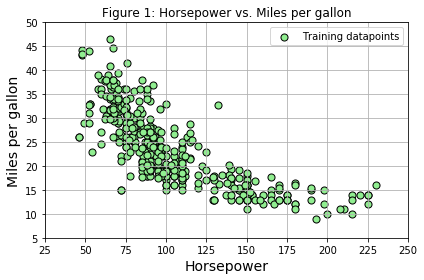

In [6]:
plt.figure(1)
plt.title('Figure 1: Horsepower vs. Miles per gallon')
plot_dataset(X,y)
plt.axis([25,250,5,50])
plt.legend()
save_fig("poly_data")
plt.show()

In [7]:
Xlin = np.insert(X,0,1,axis=1)
theta_lin = normal_equation(Xlin,y)

Saving figure linear_regression


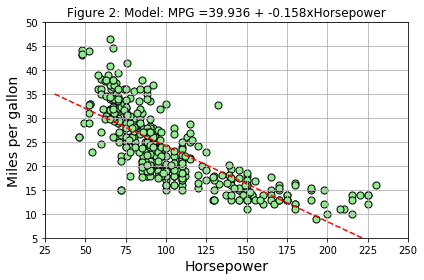

In [8]:
plt.figure(2)
plt.title('Figure 2: Model: MPG =%.3f + %.3fxHorsepower'%(theta_lin[0], theta_lin[1]))
plot_dataset(X,y)
plot_linear_reg(X,theta_lin)
plt.axis([25,250,5,50])
save_fig("linear_regression")
plt.show()

In [9]:
Xpoly = poly_features(X,2)
Xpoly = np.insert(Xpoly,0,1,axis=1)

In [10]:
theta_ne = normal_equation(Xpoly,y)
print("Model: h(x) = %.3f + %.3fx(horsepower) + %.3fx(horsepower^2)"%(theta_ne[0],theta_ne[1],theta_ne[2]))

Model: h(x) = 56.900 + -0.466x(horsepower) + 0.001x(horsepower^2)


Saving figure poly_regression


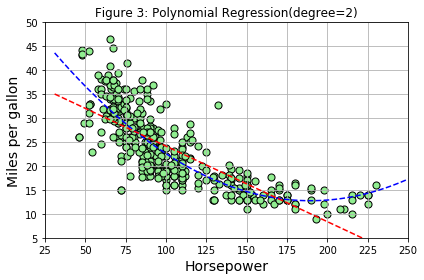

In [11]:
plt.figure(3)
plot_polynomial_reg(X,theta_ne,2)
plot_linear_reg(X,theta_lin)
plot_dataset(X,y)
plt.axis([25,250,5,50])
save_fig("poly_regression")
plt.show()